In [24]:
import pandas as pd
from scipy.stats import ttest_ind
from datetime import datetime
import numpy as np
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [8]:
web_logs = pd.read_csv('2022-04-01T12_df_web_logs.csv')
web_logs['date'] = pd.to_datetime(web_logs['date'])
web_logs.head(3)

,user_id,page,date,load_time
0,f25239,m,2022-02-03 23:45:37,80.8
1,06d6df,m,2022-02-03 23:49:56,70.5
2,06d6df,m,2022-02-03 23:51:16,89.7


In [9]:
dt_beg = datetime(2022,3,1)
dt_end = datetime(2022,3,8)
web_logs_hist = web_logs[(web_logs['date']>=dt_beg)&(web_logs['date']<=dt_end)]
web_logs_hist.head(3)

,user_id,page,date,load_time
885082,434cf2,m,2022-03-01 00:00:02,69.8
885083,80fa93,m,2022-03-01 00:00:06,86.3
885084,434cf2,b,2022-03-01 00:02:20,58.0


In [13]:
alpha = 0.05
sample_size = 1000

mean = web_logs_hist['load_time'].mean()
std = web_logs_hist['load_time'].std()

eff = mean * 0.01

In [19]:
users = web_logs_hist['user_id'].unique()
np.random.shuffle(users)
print(len(users))
a = users[:sample_size]
b = users[sample_size:sample_size*2]
group_a = web_logs_hist[web_logs_hist['user_id'].isin(a)]['load_time']
group_b = web_logs_hist[web_logs_hist['user_id'].isin(b)]['load_time']*1.01
print(ttest_ind(group_a, group_b))

35086
Ttest_indResult(statistic=-0.5487023854285676, pvalue=0.5832185741428875)


array([[<AxesSubplot:title={'center':'load_time'}>]], dtype=object)

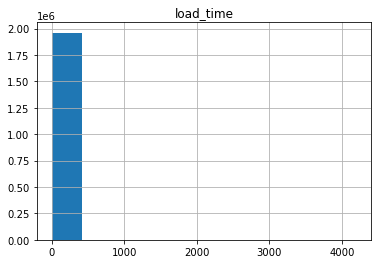

In [20]:
web_logs.hist('load_time')

In [26]:
def check_ttest(a, b, alpha):
    """Тест Стьюдента. Возвращает 1, если отличия значимы."""
    _, pvalue = ttest_ind(a, b)
    return int(pvalue < alpha)

In [31]:
web_logs_hist_1 = web_logs_hist[(web_logs_hist['load_time']>=np.quantile(web_logs_hist['load_time'],0.0002))&(web_logs_hist['load_time']<=np.quantile(web_logs_hist['load_time'],0.9998))]

alpha = 0.05
users = web_logs_hist_1['user_id'].unique()

result_ab = []
for _ in tqdm(range(1000)):
    np.random.shuffle(users)
    a, b = users[:sample_size], users[sample_size+1:sample_size*2]
    group_a = web_logs_hist_1[web_logs_hist['user_id'].isin(a)]['load_time']
    group_b = web_logs_hist_1[web_logs_hist['user_id'].isin(b)]['load_time']*1.01
    result_ab.append(check_ttest(group_a, group_b, alpha))
power_test = np.mean(result_ab)
print('Для 1-го случая мощность теста равна = ',power_test)

  0%|          | 0/1000 [00:00<?, ?it/s]

Для 1-го случая мощность теста равна =  0.074


In [32]:
web_logs_hist_1 = web_logs_hist[(web_logs_hist['load_time']>=np.quantile(web_logs_hist['load_time'],0.002))&(web_logs_hist['load_time']<=np.quantile(web_logs_hist['load_time'],0.998))]

alpha = 0.05
users = web_logs_hist_1['user_id'].unique()

result_ab = []
for _ in tqdm(range(1000)):
    np.random.shuffle(users)
    a, b = users[:sample_size], users[sample_size+1:sample_size*2]
    group_a = web_logs_hist_1[web_logs_hist['user_id'].isin(a)]['load_time']
    group_b = web_logs_hist_1[web_logs_hist['user_id'].isin(b)]['load_time']*1.01
    result_ab.append(check_ttest(group_a, group_b, alpha))
power_test = np.mean(result_ab)
print('Для 2-го случая мощность теста равна = ',power_test)

  0%|          | 0/1000 [00:00<?, ?it/s]

Для 2-го случая мощность теста равна =  0.888


In [33]:
web_logs_hist_1 = web_logs_hist[(web_logs_hist['load_time']>=np.quantile(web_logs_hist['load_time'],0.02))&(web_logs_hist['load_time']<=np.quantile(web_logs_hist['load_time'],0.98))]

alpha = 0.05
users = web_logs_hist_1['user_id'].unique()

result_ab = []
for _ in tqdm(range(1000)):
    np.random.shuffle(users)
    a, b = users[:sample_size], users[sample_size+1:sample_size*2]
    group_a = web_logs_hist_1[web_logs_hist['user_id'].isin(a)]['load_time']
    group_b = web_logs_hist_1[web_logs_hist['user_id'].isin(b)]['load_time']*1.01
    result_ab.append(check_ttest(group_a, group_b, alpha))
power_test = np.mean(result_ab)
print('Для 3-го случая мощность теста равна = ',power_test)

  0%|          | 0/1000 [00:00<?, ?it/s]

Для 3-го случая мощность теста равна =  0.965


In [34]:
web_logs_hist_1 = web_logs_hist[(web_logs_hist['load_time']>=np.quantile(web_logs_hist['load_time'],0.1))&(web_logs_hist['load_time']<=np.quantile(web_logs_hist['load_time'],0.9))]

alpha = 0.05
users = web_logs_hist_1['user_id'].unique()

result_ab = []
for _ in tqdm(range(1000)):
    np.random.shuffle(users)
    a, b = users[:sample_size], users[sample_size+1:sample_size*2]
    group_a = web_logs_hist_1[web_logs_hist['user_id'].isin(a)]['load_time']
    group_b = web_logs_hist_1[web_logs_hist['user_id'].isin(b)]['load_time']*1.01
    result_ab.append(check_ttest(group_a, group_b, alpha))
power_test = np.mean(result_ab)
print('Для 4-го случая мощность теста равна = ',power_test)

  0%|          | 0/1000 [00:00<?, ?it/s]

Для 4-го случая мощность теста равна =  0.999


In [35]:
web_logs_hist_1 = web_logs_hist[(web_logs_hist['load_time']>=np.quantile(web_logs_hist['load_time'],0.2))&(web_logs_hist['load_time']<=np.quantile(web_logs_hist['load_time'],0.8))]

alpha = 0.05
users = web_logs_hist_1['user_id'].unique()

result_ab = []
for _ in tqdm(range(1000)):
    np.random.shuffle(users)
    a, b = users[:sample_size], users[sample_size+1:sample_size*2]
    group_a = web_logs_hist_1[web_logs_hist['user_id'].isin(a)]['load_time']
    group_b = web_logs_hist_1[web_logs_hist['user_id'].isin(b)]['load_time']*1.01
    result_ab.append(check_ttest(group_a, group_b, alpha))
power_test = np.mean(result_ab)
print('Для 5-го случая мощность теста равна = ',power_test)

  0%|          | 0/1000 [00:00<?, ?it/s]

Для 5-го случая мощность теста равна =  1.0
